<a href="https://colab.research.google.com/github/utsusemi82/TelecomChurnPrediction/blob/master/Telecom_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom Churn Prediction**

**Churn prediction** is a critical challenge in the telecom industry. Accurately identifying customers likely to leave can help companies implement retention strategies.

In this project, I use a real-world telecom dataset to build a ML model that predicts customer churn. I will also explain the model using SHAP and deploy a simple Streamlit app.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mnassrib/telecom-churn-datasets")

print("Path to dataset files:", path)

100%|██████████| 99.5k/99.5k [00:00<00:00, 51.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mnassrib/telecom-churn-datasets/versions/1


In [ ]:
!python --version

Python 3.11.12


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import joblib
from google.colab import files

 #### Load & Understand Data

Load both training and testing dataset.
*   churn-bigml-80.csv → training data
*   churn-bigml-20.csv → test data

In [ ]:
train = pd.read_csv(f"{path}/churn-bigml-80.csv")
test = pd.read_csv(f"{path}/churn-bigml-20.csv")

In [ ]:
train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [ ]:
train.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
# Check for missing values
train.isnull().sum()

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


In [ ]:
train.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

#### Data Preprocessing

In [ ]:
# Convert 'yes'/'no' to 1/0 for categorical features
train = train.replace({'yes': 1, 'no': 0})

# One-hot encode categorical variables (if there are any left)
train = pd.get_dummies(train, drop_first=True)

# Preview the data after encoding
train.head()


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,False,False,False,False,False,False,False,False,False,True
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,False,False,False,False,False,False,False,False,False,True
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,False,False,False,False,False,False,False,False,False,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,False,False,False,False,False,False,False,False,True,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,False,False,False,False,False,False,False,False,True,False


#### Exploratory Data Analysis (EDA)

In [ ]:
sns.set(style="whitegrid")

<ipython-input-20-490754fd5c96>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=train, palette='pastel')


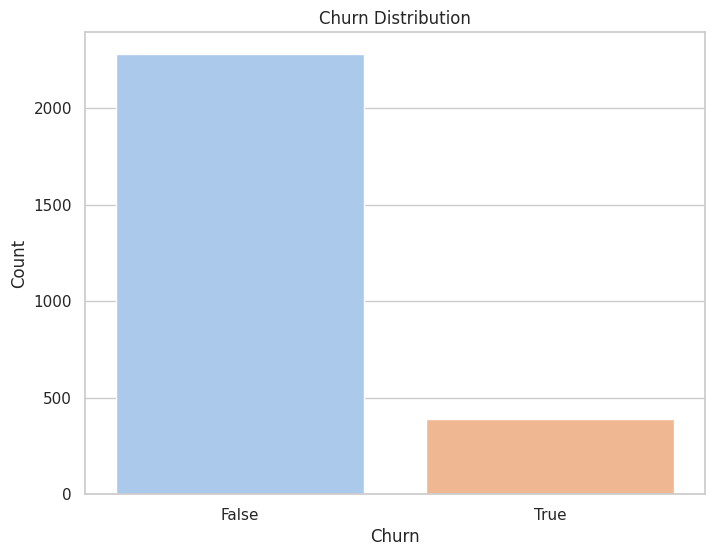

In [ ]:
# Churn Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=train, palette='pastel')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

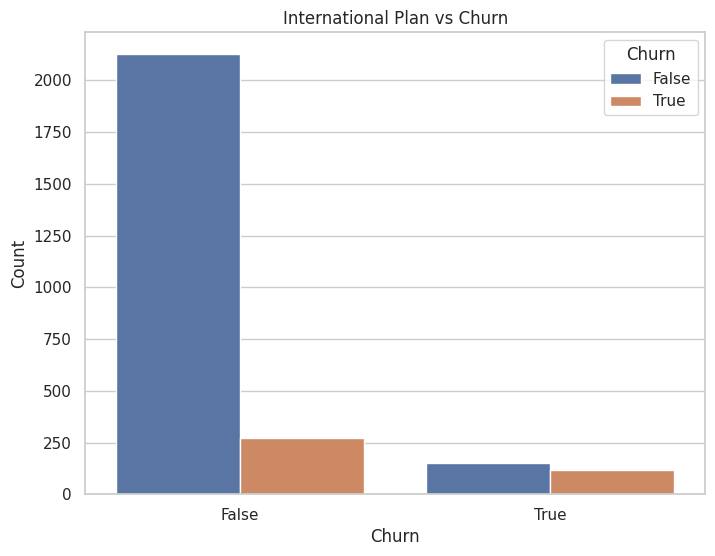

In [ ]:
# International Plan vs Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='International plan_Yes', hue='Churn', data=train)
plt.title('International Plan vs Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

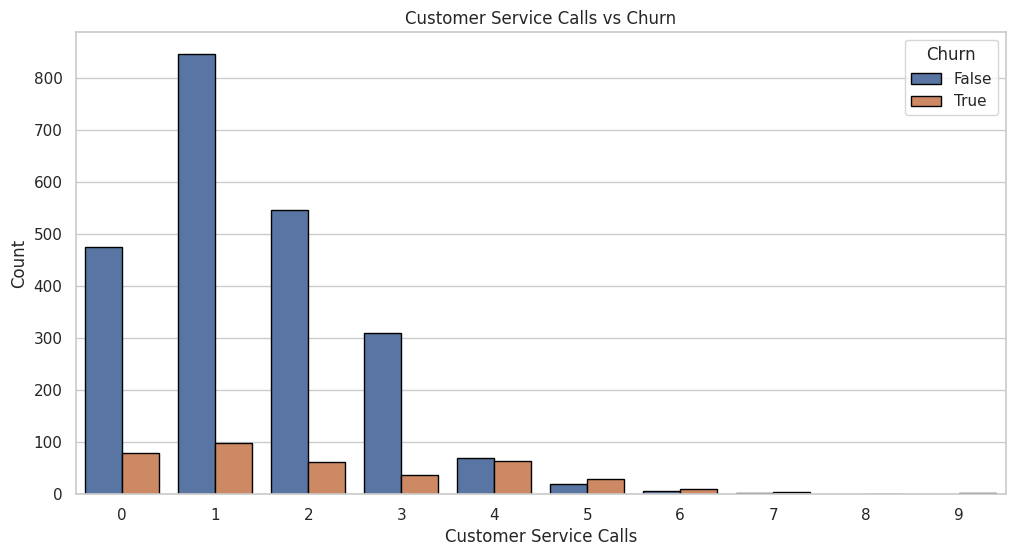

In [ ]:
# Customer Service Calls vs Churn
plt.figure(figsize=(12, 6))
sns.countplot(x='Customer service calls', hue='Churn',edgecolor='black', data=train)
plt.xlabel('Customer Service Calls')
plt.ylabel('Count')
plt.title('Customer Service Calls vs Churn')
plt.show()

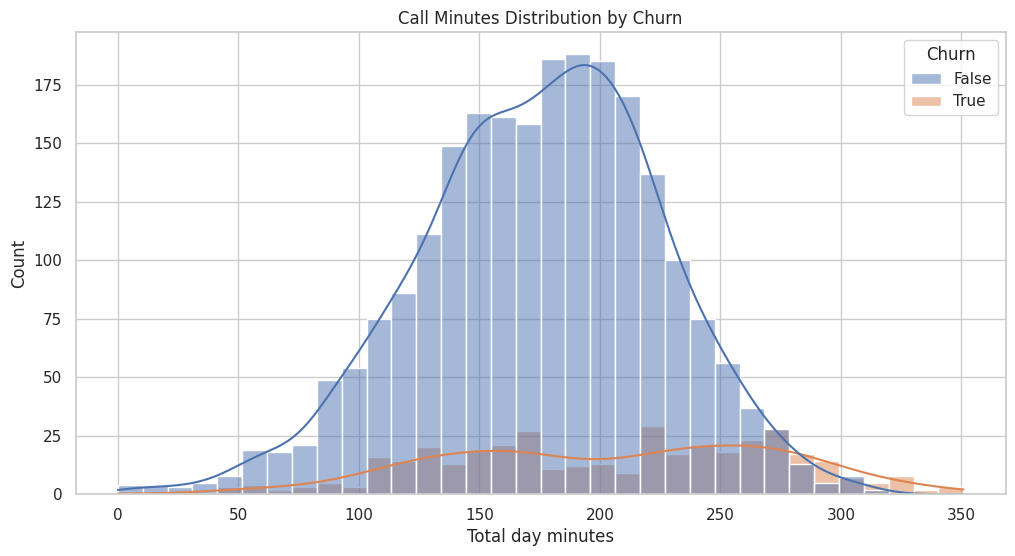

In [ ]:
# Call Minutes Distribution by Churn
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Total day minutes', hue='Churn', kde=True)
plt.title('Call Minutes Distribution by Churn')
plt.xlabel('Total day minutes')
plt.show()

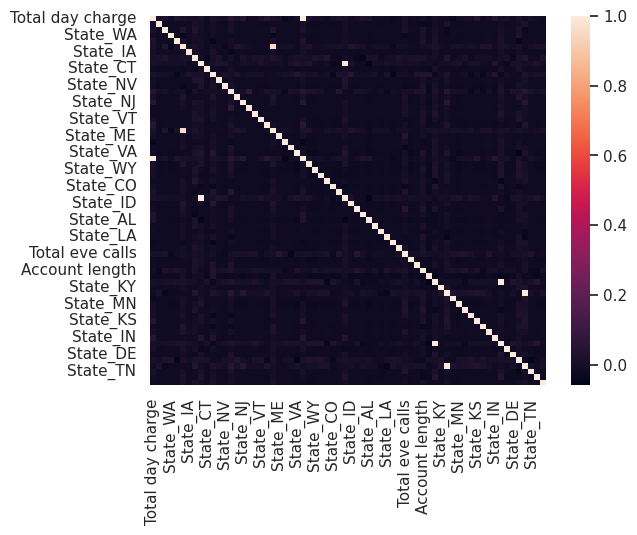

In [ ]:
# Drop non-numerical variables
numerical = list(
    set(train.columns)
    - {
        "State",
        "International plan",
        "Voice mail plan",
        "Area code",
        "Churn",
        "Customer service calls",
    }
)

# Calculate and plot
corr_matrix = train[numerical].corr()
sns.heatmap(corr_matrix);

#### Feature Engineering

In [ ]:
from sklearn.model_selection import train_test_split

X = train.drop('Churn', axis=1)
y = train['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

#### Model Building

-  Random Forest Classifier(default)
- Logistic Regression
- KNeighbors Classifier
- SVM Classifier
- Decision Tree Classifier
- Gradient Boost Classifier
- Lightweight Neural Network

*Note: trying others just for training purpose*

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Random Forest Classifier (Default):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Random Forest Classifier (Default):
Accuracy: 0.9382022471910112

Classification Report:
               precision    recall  f1-score   support

       False       0.94      1.00      0.96       456
        True       0.96      0.60      0.74        78

    accuracy                           0.94       534
   macro avg       0.95      0.80      0.85       534
weighted avg       0.94      0.94      0.93       534



In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

print("Logistic Regression Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Classifier:
Accuracy: 0.8426966292134831

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.95      0.91       456
        True       0.42      0.21      0.28        78

    accuracy                           0.84       534
   macro avg       0.65      0.58      0.59       534
weighted avg       0.81      0.84      0.82       534



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create KNN model with adjusted number of neighbours
# Increase neighbours and weighted voting)
knn = KNeighborsClassifier(n_neighbors=20, weights='distance')
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print("Adjusted K-Nearest Neighbors Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: Evaluate using cross-validation
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print("Average cross-validation score:", np.mean(cv_scores))

Adjusted K-Nearest Neighbors Classifier:
Accuracy: 0.8539325842696629

Classification Report:
               precision    recall  f1-score   support

       False       0.85      1.00      0.92       456
        True       0.00      0.00      0.00        78

    accuracy                           0.85       534
   macro avg       0.43      0.50      0.46       534
weighted avg       0.73      0.85      0.79       534

Average cross-validation score: 0.8550659146133632


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# SVM
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)

print("Support Vector Machine Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Support Vector Machine Classifier:
Accuracy: 0.8445692883895131

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.95      0.91       456
        True       0.44      0.22      0.29        78

    accuracy                           0.84       534
   macro avg       0.66      0.58      0.60       534
weighted avg       0.81      0.84      0.82       534



In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Decision Tree Classifier:
Accuracy: 0.9138576779026217

Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.95      0.95       456
        True       0.72      0.68      0.70        78

    accuracy                           0.91       534
   macro avg       0.83      0.82      0.82       534
weighted avg       0.91      0.91      0.91       534



In [ ]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

print("Gradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Gradient Boosting Classifier:
Accuracy: 0.9438202247191011

Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.98      0.97       456
        True       0.88      0.72      0.79        78

    accuracy                           0.94       534
   macro avg       0.91      0.85      0.88       534
weighted avg       0.94      0.94      0.94       534



In [ ]:
# Lightweight Neural Network
# Assuming a small network with one hidden layer of 100 neurons
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

neural_network = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
neural_network.fit(X_train, y_train)

y_pred = neural_network.predict(X_test)

print("Lightweight Neural Network Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Lightweight Neural Network Classifier:
Accuracy: 0.850187265917603

Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.91      0.91       456
        True       0.49      0.50      0.49        78

    accuracy                           0.85       534
   macro avg       0.70      0.71      0.70       534
weighted avg       0.85      0.85      0.85       534



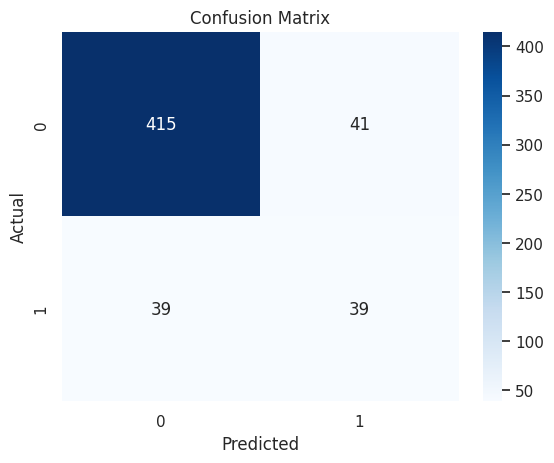

In [ ]:
# Confusion Matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Model Comparison & Evaluation

#### ROC Curve

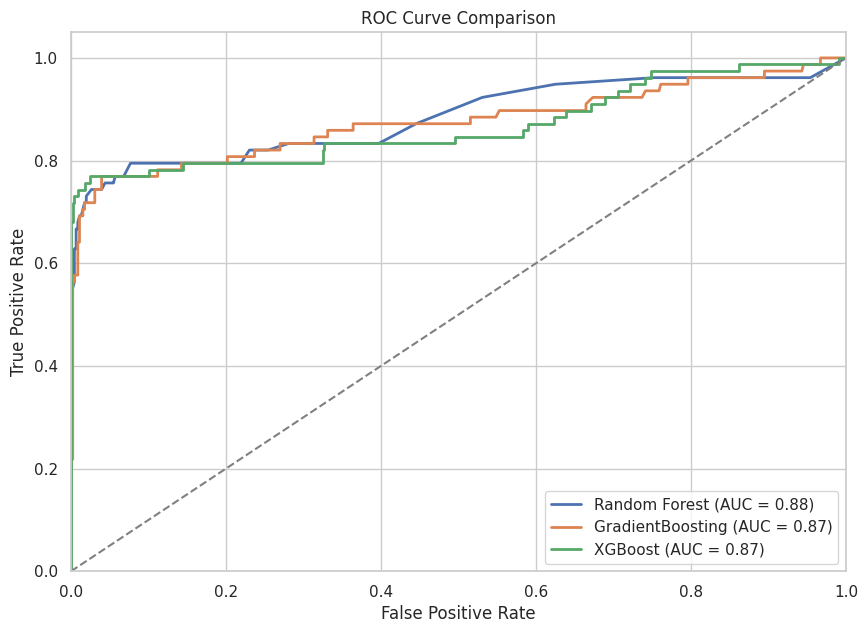

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

plt.figure(figsize=(10, 7))

for name, clf in models.items():
    # Get predicted probabilities
    if hasattr(clf, "predict_proba"):
        y_proba = clf.predict_proba(X_test)[:, 1]
    else:
        y_proba = clf.decision_function(X_test)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot random line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
from xgboost import XGBClassifier

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.4f}")


Random Forest Accuracy: 0.9382
GradientBoosting Accuracy: 0.9419


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:19:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9551


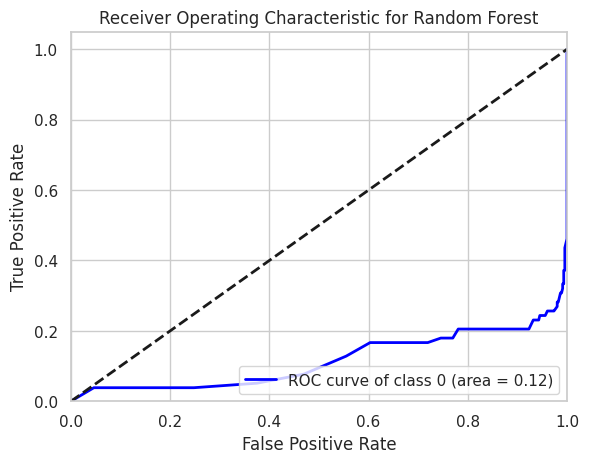

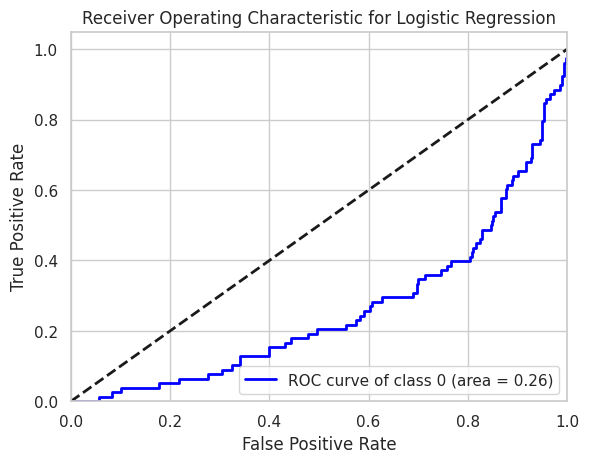

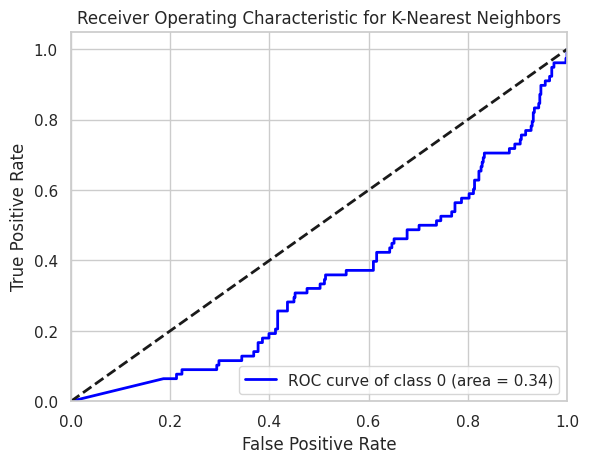

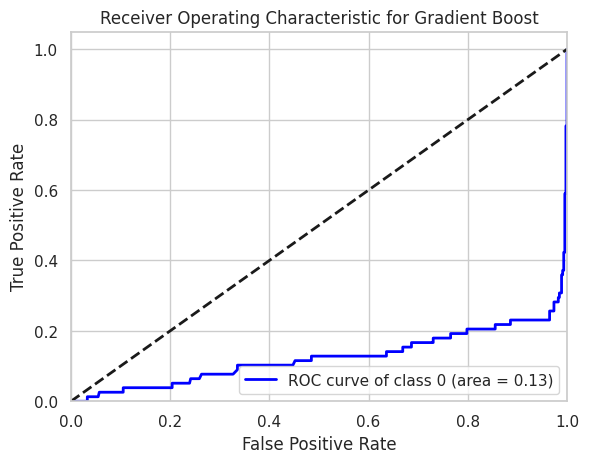

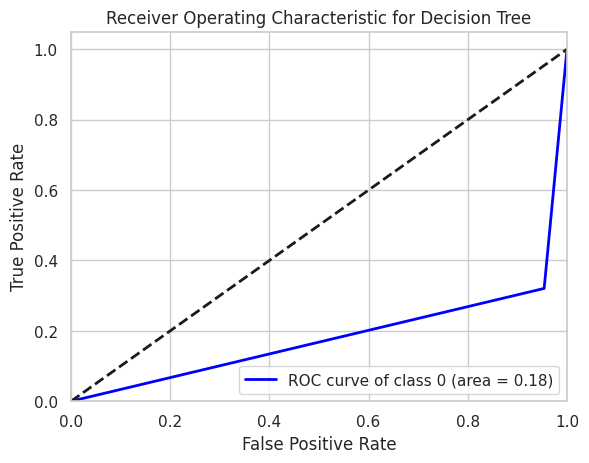

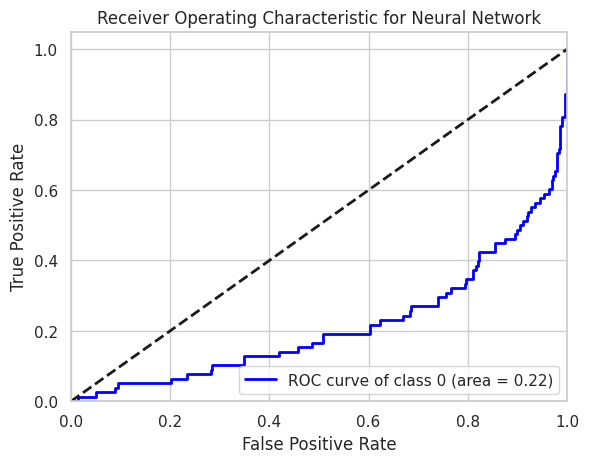

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

# Assuming y_test is not binarized yet
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Function to plot ROC curve for each class
def plot_multiclass_roc_auc(model, X_test, y_test_binarized, n_classes, model_name):
    # Binarize the output
    y_score = model.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Interpolate all ROC curves at these points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Average and compute AUC
    mean_tpr /= n_classes

    # Plot all ROC curves
    plt.figure()
    colors = cycle(['blue', 'red', 'green', 'yellow', 'purple', 'orange'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC AUC for each model
plot_multiclass_roc_auc(rf_model, X_test, y_test_binarized, n_classes, 'Random Forest')
plot_multiclass_roc_auc(logistic_model, X_test, y_test_binarized, n_classes, 'Logistic Regression')
plot_multiclass_roc_auc(knn, X_test_scaled, y_test_binarized, n_classes, 'K-Nearest Neighbors')
#plot_multiclass_roc_auc(svm, X_test, y_test_binarized, n_classes, 'Support Vector Machine')
plot_multiclass_roc_auc(gb, X_test, y_test_binarized, n_classes, 'Gradient Boost')
plot_multiclass_roc_auc(dt, X_test, y_test_binarized, n_classes, 'Decision Tree')
plot_multiclass_roc_auc(neural_network, X_test, y_test_binarized, n_classes, 'Neural Network')

### Summary

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Collect results into a summary DataFrame
results = []

for name, clf in models.items():
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else clf.decision_function(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })

results_df = pd.DataFrame(results).sort_values(by='ROC AUC', ascending=False)
results_df.reset_index(drop=True, inplace=True)
results_df.style.background_gradient(cmap='Blues')


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Random Forest,0.938202,0.959184,0.602564,0.740157,0.883491
1,GradientBoosting,0.943820,0.875000,0.717949,0.788732,0.874185
2,XGBoost,0.955056,0.950000,0.730769,0.826087,0.867409


####  Precision-Recall Curve Comparison

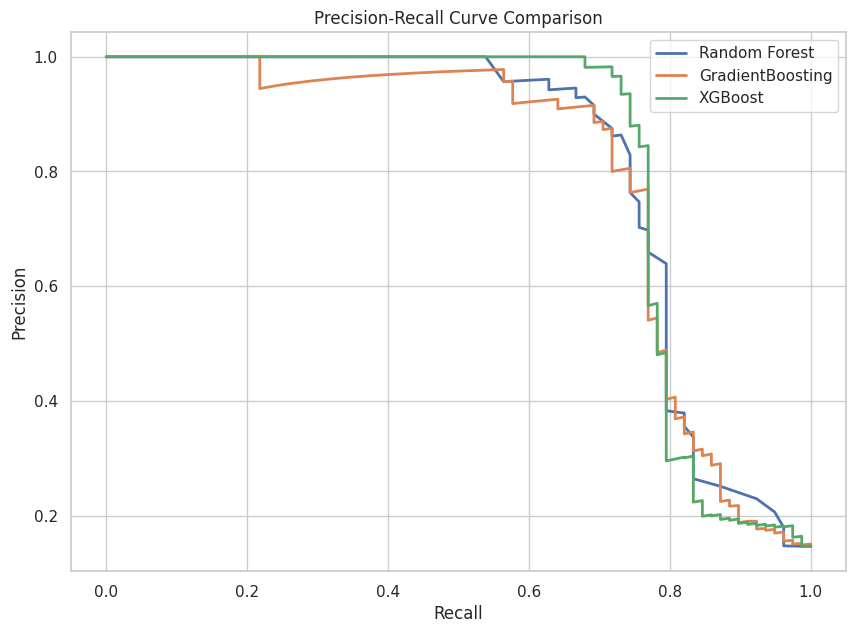

In [ ]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10, 7))

for name, clf in models.items():
    y_scores = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else clf.decision_function(X_test)
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    plt.plot(recall, precision, lw=2, label=f"{name}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc='best')
plt.grid(True)
plt.show()


### Streamlit Deployment

- final trained model: Gradient Boost Model

In [ ]:
# Save Model

model = joblib.dump(gb, 'gb.joblib')[0]
files.download(model)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Streamlit app (app.py)
!pip install streamlit
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load the trained model
model = joblib.load('gb.joblib')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 88.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00


#### This project successfully built a churn prediction model using Random Forest. It demonstrates the full ML lifecycle and is ideal for showcasing to recruiters and potential employers.
